# CUSTOMER CHURN PREDICTION-data_preprocessing

## Introduction
Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. In today’s competitive market, churn is a critical business metric, as it directly affects revenue, growth, and long-term customer value.

This project utilizes the Customer Churn Dataset provided by Muhammad Shahid Azeem on Kaggle. The dataset contains detailed customer-level information, including demographics, account and billing details, service subscriptions, and a churn label indicating whether the customer has left the service.

By analyzing this dataset, we aim to uncover patterns and risk factors associated with customer churn. These insights will enable businesses to improve customer retention strategies and apply predictive models to identify at-risk customers in advance.

## Objectives
In this project, we will:

- Calculate the overall churn rate
- Identify churn patterns based on demographic and behavioral features
- Determine which features are most important in predicting churn
- Build a predictive model to identify customers at high risk of leaving

Ultimately, this analysis aims to support decision-making strategies that help reduce customer turnover and improve customer retention.

## Standard package imports

In [1]:
#import libraries
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import joblib

## Data Description
Each row in the dataset represents an individual customer, described by the following features:

- CustomerID: Unique identifier for each customer
- Age: Age of the customer
- Gender: Customer gender (Male/Female)
- Tenure: Number of months the customer has been with the company
- Usage Frequency: Frequency of service usage
- Support Calls: Number of customer support calls made
- Payment Delay: Number of delayed payments
- Subscription Type: Type of subscription plan (Standard/Basic/Premium)
- Contract Length: Duration of the service contract (Annual/Monthly/Quarterly)
- Total Spend: Total amount the customer has spent
- Last Interaction: Days since the last interaction with the service
- Churn: Target variable (1 = churned, 0 = retained)

This churn column is the binary classification target that we aim to predict.

In [2]:
#load the dataset
file_path = "data/customer_churn_dataset-training-master.csv"
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


## Data cleaning

In [5]:
#drop rows with missing values
df_clean = df.dropna()

In [6]:
#remove all rows with duplicated CustomerID
df_clean = df_clean[~df_clean['CustomerID'].duplicated(keep=False)]

### Why drop CustomerID?
The `CustomerID` column is a unique identifier assigned to each customer. While it is useful for tracking or referencing individual records, it does not provide any meaningful information for predicting customer churn. Since machine learning models may mistakenly try to find patterns in arbitrary IDs, including this column could introduce noise and lead to overfitting. Therefore, it is best to drop `CustomerID` from the feature set before modeling.

In [7]:
#drop CustomerID
df_clean = df.drop(columns=["CustomerID"])

## Calculating the Overall Churn Rate
Calculate the proportion of customers who have discontinued the service (churned) out of the total number of customers.

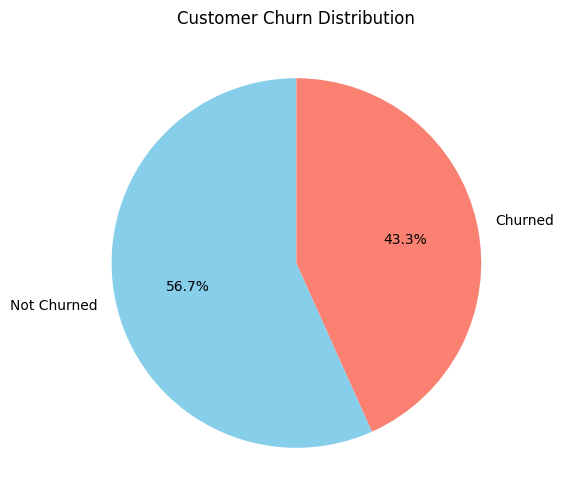

In [8]:
#Pie chart of churn distribution
plt.figure(figsize=(6, 6))
df_clean['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Not Churned', 'Churned'], colors=['skyblue', 'salmon'])
plt.title("Customer Churn Distribution")
plt.ylabel("")
plt.show()

### What does the chart show?
The pie chart illustrates the overall distribution of customer churn. According to the chart: 43.3% of customers have churned and 56.7% of customers have not churned and are still active.

This indicates that a significant portion of the customer base has left the service, highlighting a potential retention issue. The churn rate is relatively high, making it essential for the company to investigate the reasons behind customer attrition and implement effective retention strategies.

## Visualize Feature Distribution

In [9]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.histplot(frame[feature], color=color, kde=True, bins=30, stat='density', alpha=0.4)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

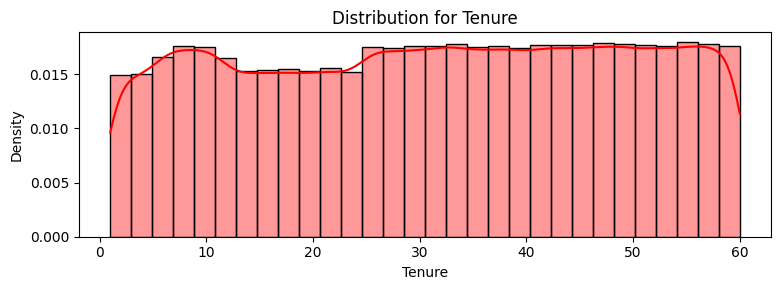

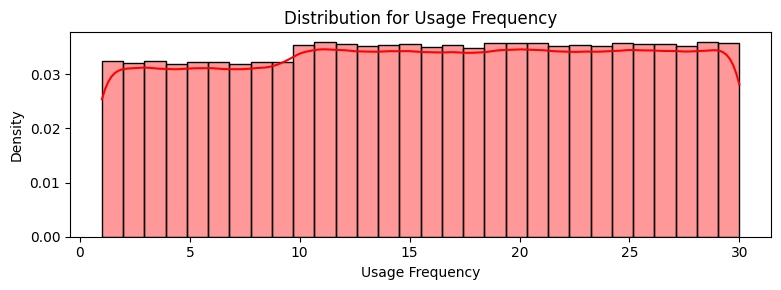

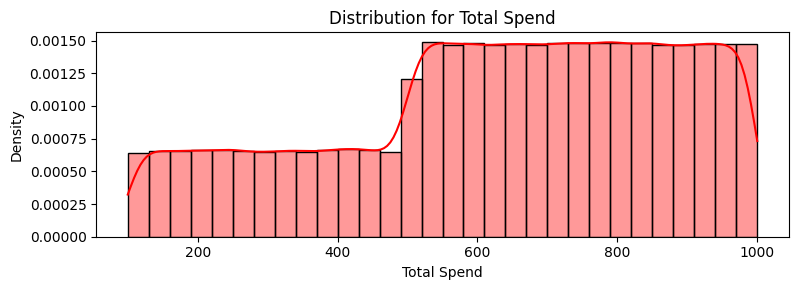

In [10]:
num_cols = ["Tenure", "Usage Frequency", "Total Spend"]
for feat in num_cols:
    distplot(feat, df)

## Identify churn patterns based on demographic and behavioral features

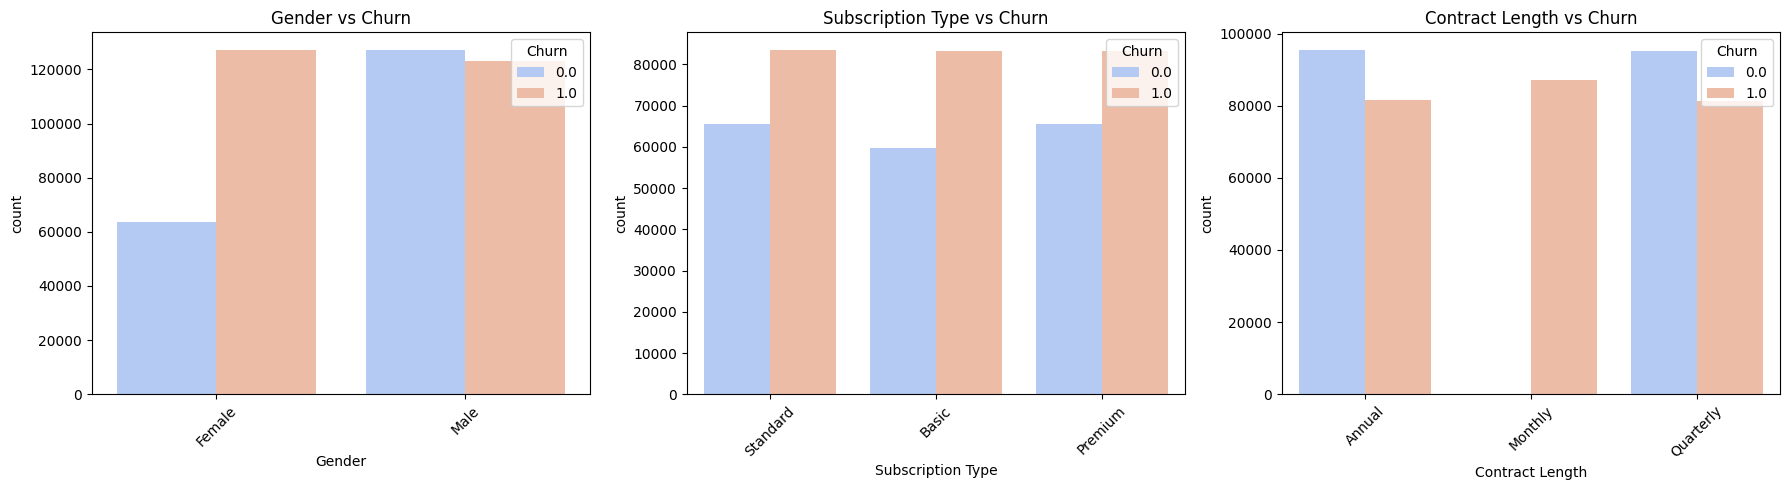

In [11]:
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]

n = len(categorical_cols)
fig, axes = plt.subplots(1, n, figsize=(6 * n, 5))

#draw countplots for categorical features vs Churn
for i, col in enumerate(categorical_cols):
    sns.countplot(ax=axes[i], x=col, hue="Churn", data=df_clean, palette="coolwarm")
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="Churn", loc='upper right')

plt.tight_layout()
plt.show()

The countplots reveal that:

- Churn occurs slightly more often across all genders, suggesting churn is not strongly gender-specific.
- Subscription type may influence churn, with Basic and Premium users showing higher churn counts.
- Contract length plays a key role: customers with annual contracts churn less than those with monthly or quarterly contracts.

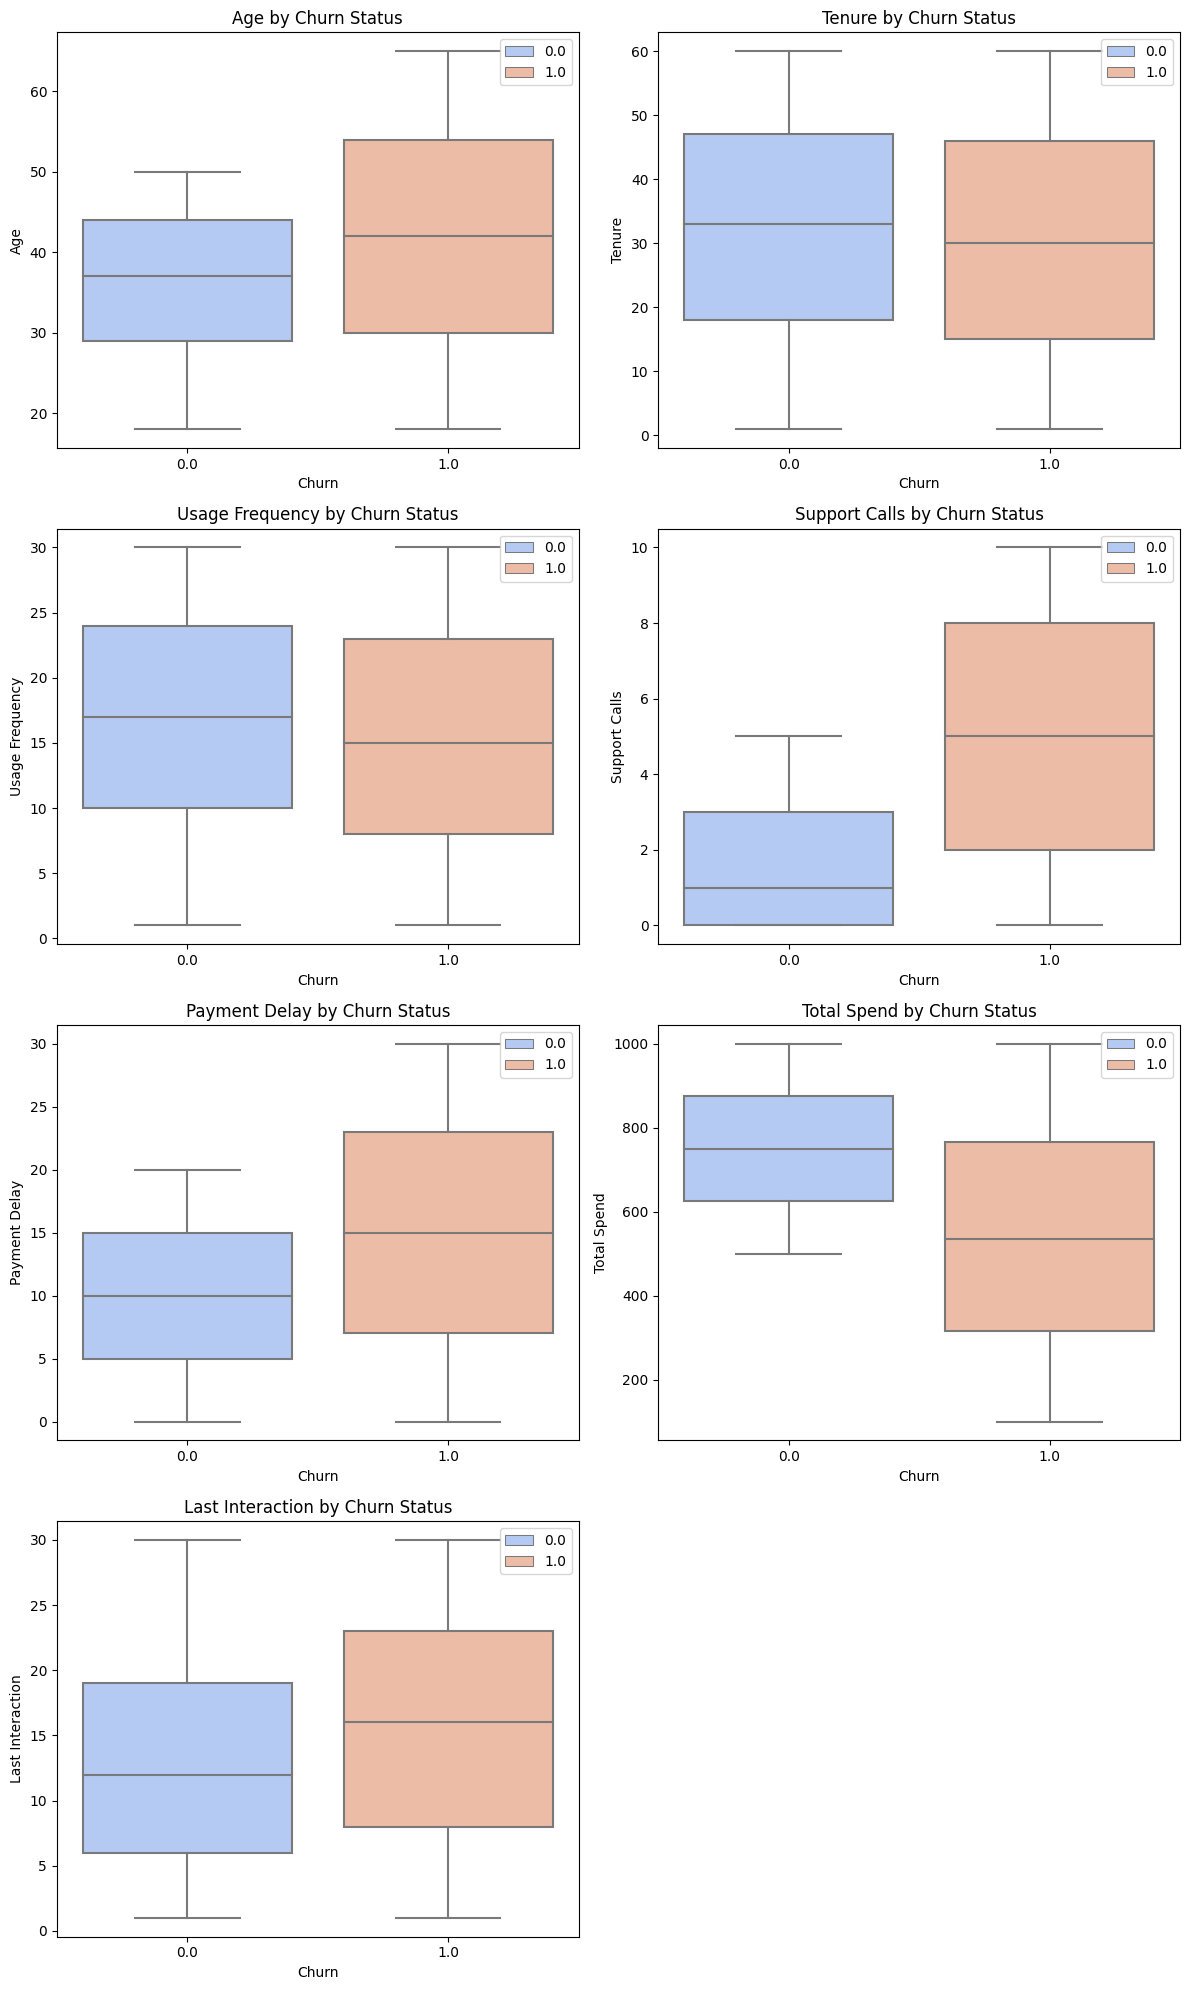

In [12]:
numerical_cols = [col for col in df_clean.columns if col not in categorical_cols + ["Churn"]]

n_cols = 2
n_rows = math.ceil(len(numerical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

#draw boxplots for numerical features vs Churn
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="Churn", y=col, data=df_clean, hue="Churn", palette="coolwarm", dodge=False, ax=axes[i])
    axes[i].set_title(f"{col} by Churn Status")
    axes[i].legend(loc='upper right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

These boxplots reveal that:

- Older customers are more likely to churn.
- Shorter tenure is associated with higher churn risk.
- Customers with lower usage frequency tend to churn more.
- More support calls may indicate dissatisfaction and correlate with churn.
- More frequent payment delays are common among churned customers.
- Lower total spend is observed in churned customers.
- Less recent interactions may signal disengagement and churn risk.

## Data Transformation

### Why is this transformation needed?
- Machine learning models require numerical inputs。
- Preserves the category for later use.

In [13]:
#drop rows with missing values
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]
df_clean = df_clean.dropna(subset=categorical_cols)

In [14]:
#encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
df_clean.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [15]:
#print mapping
for col in categorical_cols:
    print(f"Label encoding for {col}:")
    for cls, val in zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)):
        print(f"  {cls}: {val}")
    print()

Label encoding for Gender:
  Female: 0
  Male: 1

Label encoding for Subscription Type:
  Basic: 0
  Premium: 1
  Standard: 2

Label encoding for Contract Length:
  Annual: 0
  Monthly: 1
  Quarterly: 2



## Determine which features are most important in predicting churn

### Pearson Correlation Coefficient

$$
r = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$
Where:
- $\text{Cov}(X, Y)$: Covariance between variables X and Y  
- $\sigma_X$, $\sigma_Y$: Standard deviation of X and Y respectively

The **Pearson Correlation Coefficient** is a statistical measure that evaluates the **strength and direction** of the linear relationship between two continuous variables. Its value ranges from **-1 to 1**:
- **+1**: Perfect positive correlation – as one variable increases, the other increases linearly  
- **0**: No linear correlation – the variables are not linearly related  
- **-1**: Perfect negative correlation – as one variable increases, the other decreases linearly

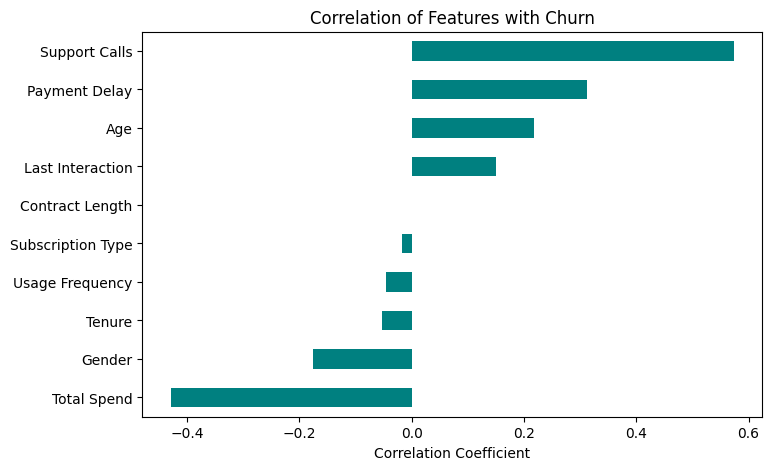

In [16]:
# Feature correlation with churn
plt.figure(figsize=(8, 5))
corr_with_target = df_clean.corr()['Churn'].drop("Churn").sort_values()
corr_with_target.plot(kind='barh', color='teal')
plt.title("Correlation of Features with Churn")
plt.xlabel("Correlation Coefficient")
plt.show()

This bar chart shows the correlation between each feature and customer churn:
- Support Calls has the strongest positive correlation with churn, meaning customers who call support more often are more likely to leave.
- Payment Delay and Age also have a moderate positive correlation with churn.
- Total Spend has the strongest negative correlation, indicating that higher-spending customers are less likely to churn.

Other features show weaker correlations.

In [17]:
#separate features and targets
X = df_clean.drop(columns=["Churn"])
y = df_clean["Churn"]

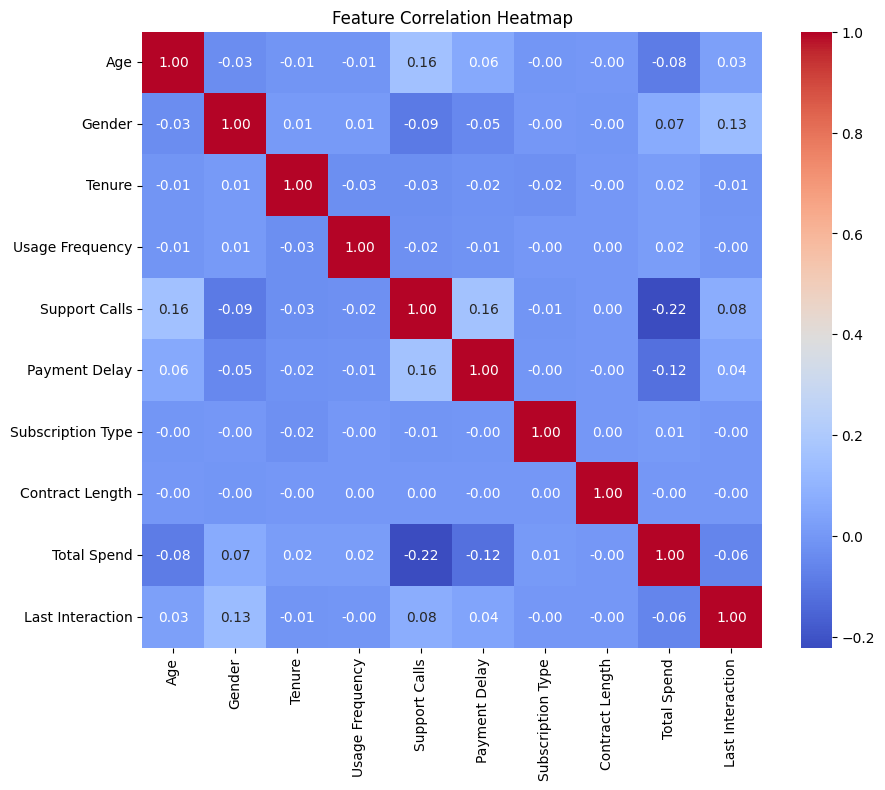

In [18]:
#visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

This heatmap shows the Pearson correlation coefficients between all numerical features in the dataset:
- Most features have low correlations with one another (close to 0), indicating low multicollinearity.
- Support Calls and Total Spend: moderately negative correlation (-0.22), meaning customers who call support more tend to spend less.
- Payment Delay and Support Calls: slightly positive correlation (0.16), suggesting these behaviors may occur together.

Overall, the heatmap shows that most features are relatively independent, which is ideal for building predictive models.

## Data Standardization
Standardization transforms features so that they have a mean of 0 and a standard deviation of 1.
This ensures that all features are on the same scale, which helps many machine learning models (e.g., logistic regression, SVM, KNN) perform better and converge faster.

In [19]:
#standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [21]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,-0.753326,-1.145909,0.448760,-0.210511,0.454549,0.609620,1.211546,-1.114664,1.247427,0.293052
1,2.059646,-1.145909,1.028278,-1.724562,2.083100,-0.601319,-1.245557,0.001692,-0.309865,-0.986584
2,1.255940,-1.145909,-1.000036,-1.375166,0.780259,0.609620,-1.245557,1.118047,-1.854698,-1.335575
3,1.497051,0.872670,0.390808,0.604748,1.105969,-0.722413,1.211546,0.001692,-0.978462,1.689018
4,-1.315921,0.872670,0.043097,0.488282,0.454549,-0.601319,-1.245557,0.001692,-0.060698,0.642043


## Principal Component Analysis
The main purpose of PCA here is to compress high-dimensional features into two dimensions in order to analyze the data structure and classification performance.

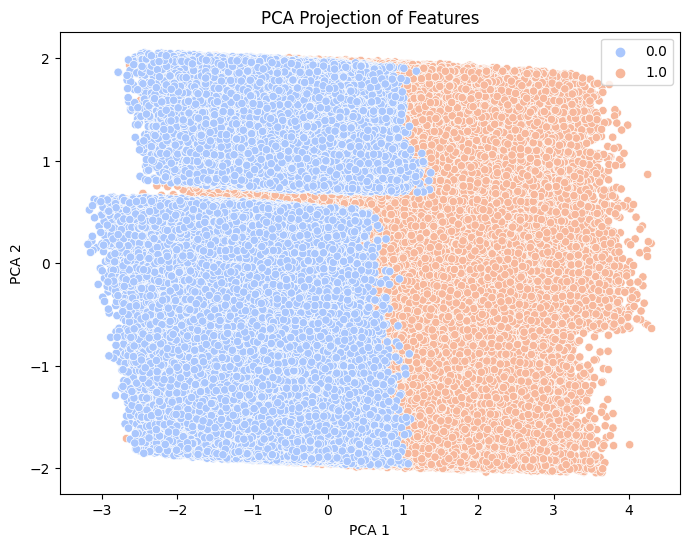

In [22]:
#PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm")
plt.legend(loc="upper right")
plt.title("PCA Projection of Features")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

The PCA projection reveals a clear linear boundary between churned and non-churned customers, which indicates strong separability in feature space.

In [23]:
X_scaled_df.to_csv("X_scaled_df.csv", index=False)
y.to_csv("y.csv", index=False)